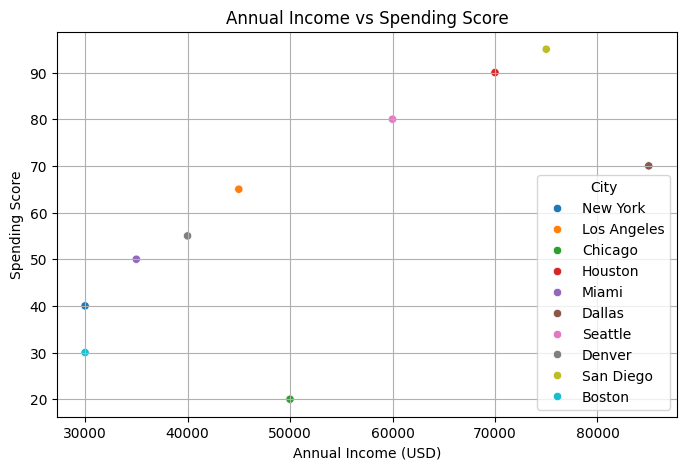

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'CustomerID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Annual_Income': [30000, 45000, 50000, 70000, 35000, 85000, 60000, 40000, 75000, 30000],
    'Spending_Score': [40, 65, 20, 90, 50, 70, 80, 55, 95, 30],
    'Age': [25, 30, 22, 40, 28, 45, 35, 33, 50, 20],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Miami',
             'Dallas', 'Seattle', 'Denver', 'San Diego', 'Boston']
}

df = pd.DataFrame(data)

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score', hue='City', palette='tab10')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (USD)')
plt.ylabel('Spending Score')
plt.grid(True)
plt.show()


In [11]:
from sklearn.cluster import KMeans

X = df[['Annual_Income', 'Spending_Score']]

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


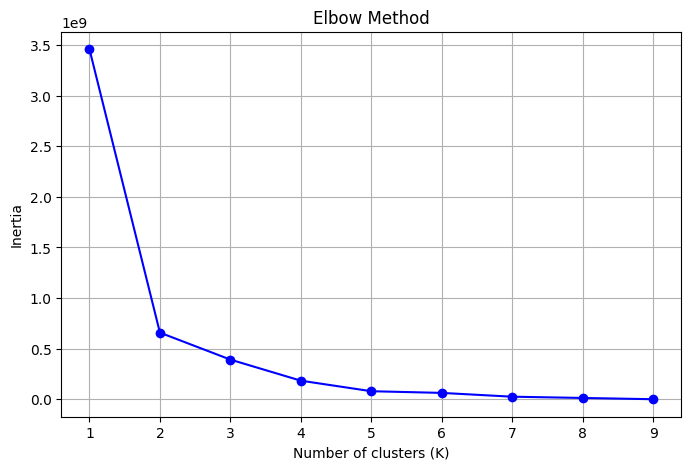

In [12]:
inertia = []
K_range = range(1, 10)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertia.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


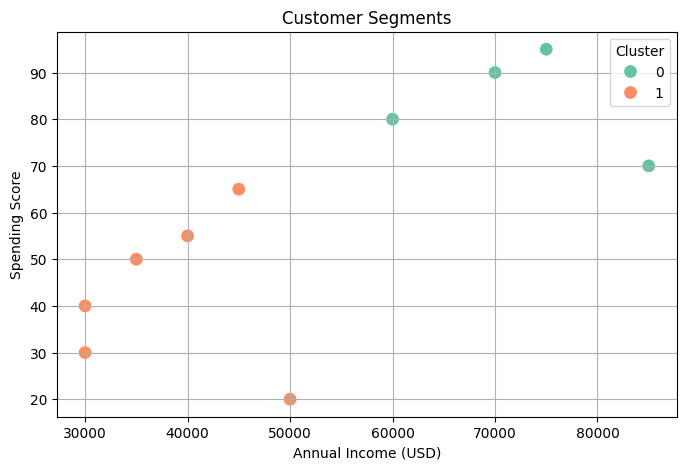

In [13]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='Cluster', data=df, palette='Set2', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (USD)')
plt.ylabel('Spending Score')
plt.grid(True)
plt.show()


In [14]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, df['Cluster'])
print(f'Silhouette Score: {score:.2f}')

Silhouette Score: 0.64


In [15]:
cluster_summary = df.groupby('Cluster')[['Annual_Income', 'Spending_Score']].mean()
print(cluster_summary)

         Annual_Income  Spending_Score
Cluster                               
0         72500.000000       83.750000
1         38333.333333       43.333333
